## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('dataset/Data_Entry_2017.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


## Number of samples per class (medical condition)

In [3]:
# Checking the balance of data across classes
# We are splitting using the delimiter '|' to account for the CXR that correspond to multiple medical conditions
disease_list = df['Finding Labels'].str.split('|').explode()
disease_counts = disease_list.value_counts()
print(disease_counts) 

Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


## Convert multi-labels so that each (image, disease) pair is a separate row

In [4]:
import pandas as pd

# Convert multi-labels so that each (image, disease) pair is a separate row
df_expanded = df.assign(Finding_Labels=df['Finding Labels'].str.split('|')).explode('Finding_Labels')

# Return the expanded dataframe
df_expanded['Labels'] = df_expanded['Finding_Labels']
df_expanded = df_expanded.drop('Finding_Labels', axis=1) 

df_expanded

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Labels
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,Emphysema
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,Cardiomegaly
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,Effusion
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,Pneumonia
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,No Finding
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,No Finding
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,No Finding


In [5]:
## Removed 'No Finding class"

In [6]:
import pandas as pd

# Convert multi-labels so that each (image, disease) pair is a separate row
df_expanded = df.assign(Finding_Labels=df['Finding Labels'].str.split('|')).explode('Finding_Labels')

# Remove rows with 'No Finding'
df_expanded = df_expanded[df_expanded['Finding_Labels'] != 'No Finding']

# Rename the column to 'Labels' and drop the original
df_expanded['Labels'] = df_expanded['Finding_Labels']
df_expanded = df_expanded.drop('Finding_Labels', axis=1)

df_expanded
df = df_expanded

In [7]:
## ****TESTING ONLY - 10 labels per medical condition

In [8]:
#target_count = 1000
#sampled_df = df_expanded.groupby('Labels', group_keys=False).apply(lambda x: x.sample(n=min(len(x), target_count), random_state=42))
#sampled_df['Labels'].value_counts()

In [9]:
#df = sampled_df

## Taking CXR from all the folders and putting them all in one space

In [10]:
import os
from glob import glob

#Taking CXR from all the folders and putting them all in one space

base_folder = "dataset/"
image_folders = [os.path.join(base_folder, f"images_{str(i).zfill(3)}", "images") for i in range(1, 13)]

image_paths = []
for folder in image_folders:
    image_paths.extend(glob(os.path.join(folder, "*")))
len(image_paths)

112120

In [11]:
from tqdm import tqdm

# Get the image names from df["Image Index"]
image_names_in_df = df["Image Index"]

image_paths = []
for folder in image_folders:
    for image_name in tqdm(image_names_in_df, desc=f"Processing {folder}"):
        image_path = os.path.join(folder, image_name)
        if os.path.exists(image_path):
            image_paths.append(image_path)


Processing dataset/images_012/images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81176/81176 [00:00<00:00, 422914.22it/s]


## CXR Visualisation

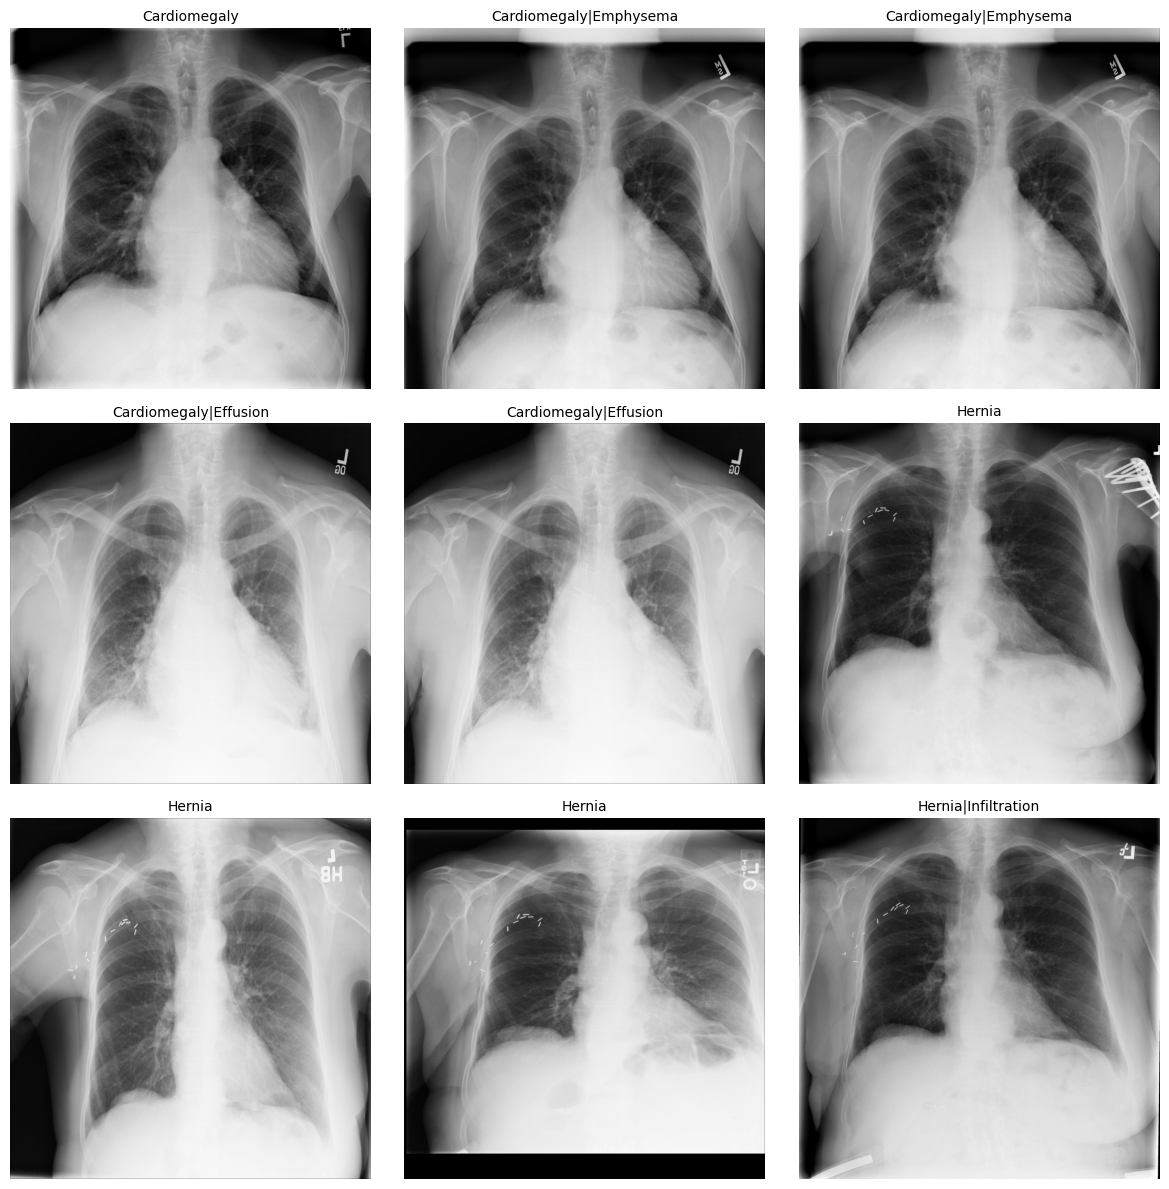

In [12]:
from PIL import Image

# Create a dictionary mapping image filenames to their full paths
image_dict = {os.path.basename(path): path for path in image_paths}

# Select images based on filenames in df
selected_images = df.iloc[:9]  # Adjust the number as needed
image_files = selected_images["Image Index"].values  # Assuming 'filename' column exists

# Create a list of valid paths
valid_paths = [image_dict[f] for f in image_files if f in image_dict]
titles = selected_images["Finding Labels"].values[: len(valid_paths)]  # Corresponding titles

# Plot images in a grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for ax, img_path, title in zip(axes.ravel(), valid_paths, titles):
    img = Image.open(img_path)
    ax.imshow(img, cmap = "gray")
    ax.set_title(title, fontsize=10)  # Display Finding Labels as title
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

## Improrting more libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import cv2
import numpy as np
from tqdm import tqdm

## Preprocessing: splitting labels and applying one-hot encoding

In [14]:
# Preprocessing: splitting labels and applying one-hot encoding
if isinstance(df['Finding Labels'].iloc[0], str):
    df['Finding Labels'] = df['Finding Labels'].apply(lambda x: x.split('|'))

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df['Finding Labels'])
label_columns = mlb.classes_

#image_paths = [os.path.join(image_folder, image_name) for image_name in df['Image Index']]
labels_df = pd.DataFrame(labels, columns=label_columns)
df['Finding Labels']

0                    [Cardiomegaly]
1         [Cardiomegaly, Emphysema]
1         [Cardiomegaly, Emphysema]
2          [Cardiomegaly, Effusion]
2          [Cardiomegaly, Effusion]
                    ...            
112106               [Mass, Nodule]
112106               [Mass, Nodule]
112108         [Pleural_Thickening]
112115            [Mass, Pneumonia]
112115            [Mass, Pneumonia]
Name: Finding Labels, Length: 81176, dtype: object

## Splitting data into training, test and validation datasets

In [15]:
# Assuming you have image_paths and labels_df defined

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels_df, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transformations optimized for RGB images
transform = transforms.Compose([
    transforms.ToPILImage(),
    #transforms.Resize((224, 224)),
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def load_and_transform_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return transform(img)

# Prepare train, validation, and test datasets with transformations
train_images = [load_and_transform_image(path) for path in tqdm(X_train, desc="Loading train images")]
valid_images = [load_and_transform_image(path) for path in tqdm(X_valid, desc="Loading valid images")]
test_images = [load_and_transform_image(path) for path in tqdm(X_test, desc="Loading test images")]

train_images = torch.stack(train_images)
valid_images = torch.stack(valid_images)
test_images = torch.stack(test_images)

# Convert labels to tensor format
num_classes = labels_df.shape[1]  # Get number of disease classes

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# DataLoader for train, validation, and test sets
# Batchsize is 32 (less computational load)
train_loader = DataLoader(list(zip(train_images, y_train_tensor)), batch_size=32, shuffle=True)
valid_loader = DataLoader(list(zip(valid_images, y_valid_tensor)), batch_size=32, shuffle=False)
test_loader = DataLoader(list(zip(test_images, y_test_tensor)), batch_size=32, shuffle=False)

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG████████████████████████████████████████████▍                                                    | 44135/64940 [12:12<05:55, 58.46it/s]
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG██████████████████████████████████████████████████████████▉                                      | 49886/64940 [13:57<05:01, 49.98it/s]
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG█████████████████████████████████████████████████████████████████████▌                           | 54099/64940 [15:25<03:40, 49.06it/s]
Loading test images: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8118/8118 [03:00<00:00, 44.87it/s]


### Model (MAIN)

In [16]:
import torch
import torch.nn as nn

import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DenseNet121MultiLabel(nn.Module):
    #Changed 15 to 14
    def __init__(self, num_labels=14, dropout_rate=0.2, fine_tune=True):
        super(DenseNet121MultiLabel, self).__init__()
        
        # Load pre-trained DenseNet-121
        self.densenet = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
        
        # Modify the final classifier layer
        in_features = self.densenet.classifier.in_features
        self.densenet.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(in_features, num_labels),
        )

    def forward(self, x):
        x = self.densenet(x)
        x = torch.sigmoid(x)
        return x

In [17]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MobileNetV2MultiLabel(nn.Module):
    def __init__(self, num_labels=14, dropout_rate=0.2):
        super(MobileNetV2MultiLabel, self).__init__()

        # Load pre-trained MobileNetV2
        self.mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        # Get input features of the last classifier layer
        in_features = self.mobilenet.classifier[1].in_features

        # Replace the classifier with dropout + linear layer for multi-label
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(in_features, num_labels)
        )

    def forward(self, x):
        x = self.mobilenet(x)
        x = torch.sigmoid(x)
        return x


## Regular DenseNet Results (DON'T RUN)

In [18]:
# import torch.optim as optim
# import torchmetrics
#  # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define model
# #model = ResNet50MultiLabel(num_labels=15)
# model = DenseNet121MultiLabel(num_labels=15, dropout_rate=0.2, fine_tune=True)
# model = model.to(device)

# # Define loss function
# criterion = nn.BCELoss()

# # Define optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay = 0.0005)

# # Adjust learning rate for the fully connected layer
# #for name, param in model.named_parameters():
# #    if "fc" in name:
# #        param.requires_grad = True
# #        optimizer.param_groups[0]['lr'] = 0.001  # 10 times the base learning rate

# # Metrics
# num_labels = len(label_columns)
# auc_metric = torchmetrics.AUROC(task='multilabel', num_labels=num_labels).to(device)
# f1_metric = torchmetrics.F1Score(task='multilabel', num_labels=num_labels, average='micro').to(device)
# hamming_loss_metric = torchmetrics.HammingDistance(task='multilabel', num_labels=num_labels).to(device)

# # Training parameters
# batch_size = 20
# max_iterations = 1000#13320
# num_epochs = max_iterations // (len(train_loader) // batch_size)
# num_epochs = 10

# best_valid_auc = 0.55
# patience = 10  # Number of epochs to wait for improvement
# counter = 0

# train_losses, valid_losses = [], []
# train_aucs, valid_aucs = [], []
# train_f1s, valid_f1s = [], []
# train_hamming_losses, valid_hamming_losses = [], []

# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0

#     # Reset metrics before training epoch
#     auc_metric.reset()
#     f1_metric.reset()
#     hamming_loss_metric.reset()
    
#     for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
#         images, labels = images.to(device), labels.to(device)
    
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
    
#         train_loss += loss.item()
#         preds = outputs.sigmoid()
        
#         # Accumulate batch results
#         auc_metric.update(preds, labels.int())
#         f1_metric.update(preds, labels.int())
#         hamming_loss_metric.update(preds, labels.int())
    

#     # Compute epoch-wide metric values
#     train_loss /= len(train_loader)
#     train_auc = auc_metric.compute().item()
#     train_f1 = f1_metric.compute().item()
#     train_hamming = hamming_loss_metric.compute().item()

#     train_losses.append(train_loss)
#     train_aucs.append(train_auc)
#     train_f1s.append(train_f1)
#     train_hamming_losses.append(train_hamming)
    
#     model.eval()
#     valid_loss = 0

#     # Reset metrics before validation
#     auc_metric.reset()
#     f1_metric.reset()
#     hamming_loss_metric.reset()
    
#     with torch.no_grad():
#         for images, labels in valid_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             valid_loss += loss.item()
#             preds = outputs.sigmoid()
            
#             # Accumulate batch results
#             auc_metric.update(preds, labels.int())
#             f1_metric.update(preds, labels.int())
#             hamming_loss_metric.update(preds, labels.int())

#     # Compute epoch-wide validation metrics
#     valid_loss /= len(valid_loader)
#     valid_auc = auc_metric.compute().item()
#     valid_f1 = f1_metric.compute().item()
#     valid_hamming = hamming_loss_metric.compute().item()

#     valid_losses.append(valid_loss)
#     valid_aucs.append(valid_auc)
#     valid_f1s.append(valid_f1)
#     valid_hamming_losses.append(valid_hamming)

#     # Early stopping check
#     if valid_auc > best_valid_auc:
#         best_valid_auc = valid_auc
#         counter = 0
#         # Optionally save the best model here
#         torch.save(model.state_dict(), 'best_model.pth')
#     else:
#         counter += 1
#         if counter >= patience:
#             print(f"Early stopping triggered after {epoch+1} epochs")
#             break

#     # After training loop
#     print(f"Best validation AUC: {best_valid_auc:.4f}")
    
#     print(f"Epoch {epoch+1}/{num_epochs}, "
#           f"Train Loss: {train_loss:.4f}, Train AUC: {train_auc:.4f}, Train F1: {train_f1:.4f}, Train Hamming: {train_hamming:.4f}, "
#           f"Valid Loss: {valid_loss:.4f}, Valid AUC: {valid_auc:.4f}, Valid F1: {valid_f1:.4f}, Valid Hamming: {valid_hamming:.4f}")

### With Weighted Loss

In [19]:
### Calculating class_weights

# Calculate positive and negative sample counts for each class
positive_counts = y_train_tensor.sum(dim=0)  # Total positive samples per class
negative_counts = len(y_train_tensor) - positive_counts  # Total negative samples per class

# Calculate weights as negative_count / positive_count for each class
class_weights = negative_counts / (positive_counts + 1e-6)  # Add epsilon to avoid division by zero

# Clip weights to prevent extreme values (optional)
class_weights = torch.clamp(class_weights, min=1.0, max=100.0)

# Move weights to the appropriate device
class_weights = class_weights.to(device)

import torch
import torch.nn as nn

class WeightedBCELoss(nn.Module):
    def __init__(self, class_weights):
        """
        Args:
            class_weights (torch.Tensor): A tensor of shape [num_classes] containing the weight for each class.
        """
        super(WeightedBCELoss, self).__init__()
        self.class_weights = class_weights

    def forward(self, outputs, targets):
        """
        Args:
            outputs (torch.Tensor): Model predictions after applying a sigmoid. Shape: [batch_size, num_classes].
            targets (torch.Tensor): Ground truth labels. Shape: [batch_size, num_classes].
        Returns:
            torch.Tensor: The weighted BCE loss.
        """
        # Apply weights to each class
        loss = nn.BCELoss(reduction='none')(outputs, targets)
        weighted_loss = loss * self.class_weights.unsqueeze(0)  # Broadcast weights across the batch
        
        # Return mean loss across all samples and classes
        return weighted_loss.mean()

HYBRID MODEL

In [20]:
import torch
import torch.nn as nn
import torchvision.models as models

# CBAM implementation (Channel + Spatial Attention)
class BasicConv(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride, padding, relu=True):
        super(BasicConv, self).__init__()
        self.out_channels = out_planes
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size,
                              stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_planes)
        self.relu = nn.ReLU(inplace=True) if relu else nn.Identity()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // reduction, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_planes // reduction, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        pad = (kernel_size - 1) // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=pad, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv(x)
        return self.sigmoid(x)

class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super(CBAM, self).__init__()
        self.ca = ChannelAttention(channels, reduction)
        self.sa = SpatialAttention(kernel_size)

    def forward(self, x):
        x = x * self.ca(x)
        x = x * self.sa(x)
        return x

class DenseNet121MultiLabelAttention(nn.Module):
    def __init__(self, num_labels=14, dropout_rate=0.2):
        super(DenseNet121MultiLabelAttention, self).__init__()
        # Load pre-trained DenseNet-121
        self.densenet = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
        # Remove the classifier
        self.features = self.densenet.features
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.cbam = CBAM(channels=1024)  # 1024 is DenseNet121 final feature map channels

        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(1024, num_labels)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.cbam(x)  # Apply CBAM attention here
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        x = torch.sigmoid(x)
        return x

# Usage:
# model = DenseNet121MultiLabelAttention(num_labels=14).to(device)


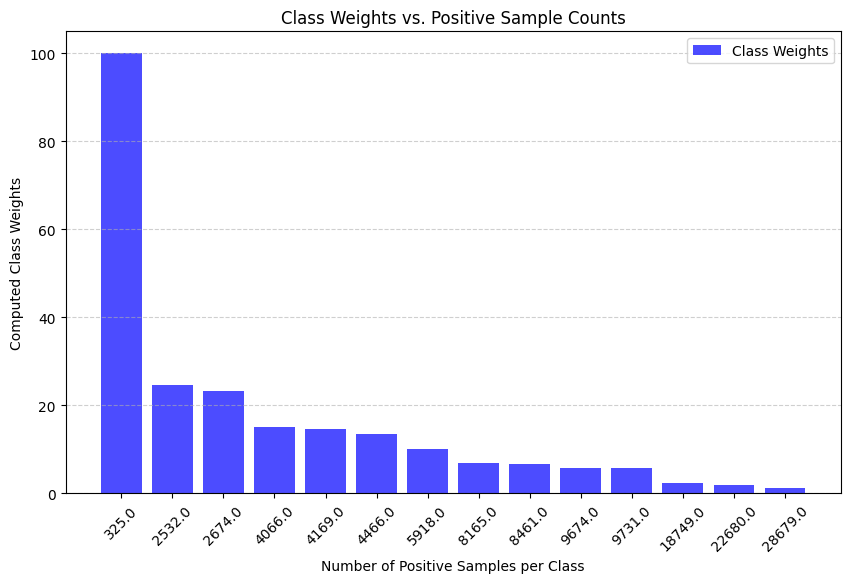

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to CPU for visualization
positive_counts_np = positive_counts.cpu().numpy()
class_weights_np = class_weights.cpu().numpy()

# Create a sorted order based on positive sample count (optional)
sorted_indices = np.argsort(positive_counts_np)
sorted_positive_counts = positive_counts_np[sorted_indices]
sorted_class_weights = class_weights_np[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_positive_counts)), sorted_class_weights, label="Class Weights", alpha=0.7, color='b')
plt.xticks(range(len(sorted_positive_counts)), sorted_positive_counts, rotation=45)
plt.xlabel("Number of Positive Samples per Class")
plt.ylabel("Computed Class Weights")
plt.title("Class Weights vs. Positive Sample Counts")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


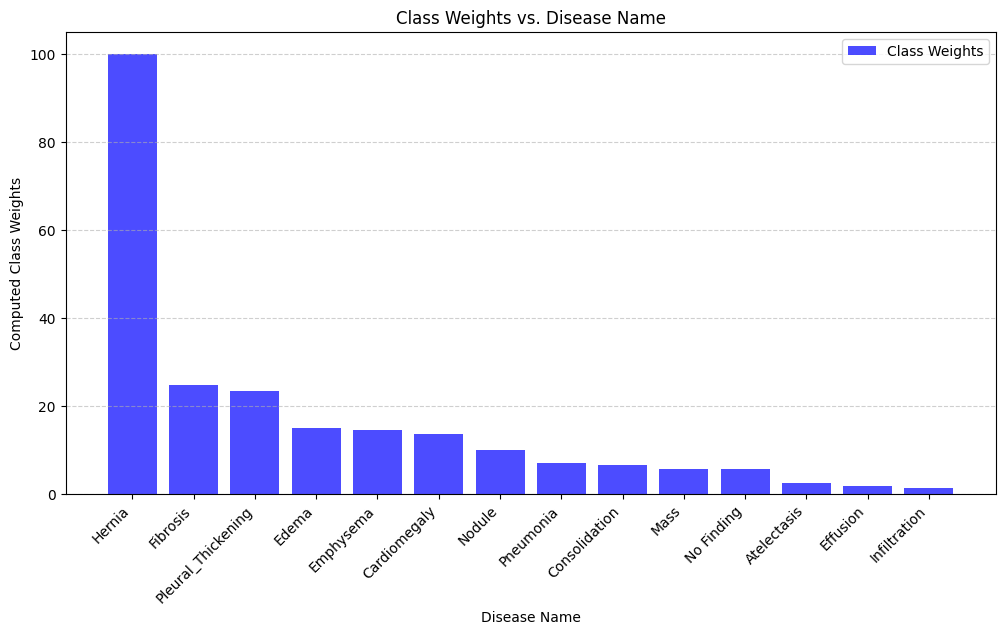

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to CPU for visualization
positive_counts_np = positive_counts.cpu().numpy()
class_weights_np = class_weights.cpu().numpy()

# List of disease names in the same order as the dataset
disease_names = np.array([
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Effusion",
    "Emphysema", "Fibrosis", "Hernia", "Infiltration", "Mass",
    "No Finding", "Nodule", "Pleural_Thickening", "Pneumonia", "Pneumothorax"
])

# Create a sorted order based on positive sample count
sorted_indices = np.argsort(positive_counts_np)
sorted_positive_counts = positive_counts_np[sorted_indices]
sorted_class_weights = class_weights_np[sorted_indices]
sorted_disease_names = disease_names[sorted_indices]  # Sort disease names accordingly

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_positive_counts)), sorted_class_weights, label="Class Weights", alpha=0.7, color='b')
plt.xticks(range(len(sorted_positive_counts)), sorted_disease_names, rotation=45, ha='right')  # Use disease names
plt.xlabel("Disease Name")
plt.ylabel("Computed Class Weights")
plt.title("Class Weights vs. Disease Name")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


## Weighted Loss Approach Results

In [23]:
import torch.optim as optim
import torchmetrics
 # Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
#model = ResNet50MultiLabel(num_labels=15)
#Changed from 15 to 14 labels
model = DenseNet121MultiLabel(num_labels=14, dropout_rate=0.2, fine_tune=True)
#model = MobileNetV2MultiLabel(num_labels=14, dropout_rate=0.2)
model = model.to(device)

# Define loss function
#criterion = nn.BCELoss()
criterion = WeightedBCELoss(class_weights=class_weights)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay = 0.0005)

# Adjust learning rate for the fully connected layer
#for name, param in model.named_parameters():
#    if "fc" in name:
#        param.requires_grad = True
#        optimizer.param_groups[0]['lr'] = 0.001  # 10 times the base learning rate

# Metrics
num_labels = len(label_columns)
auc_metric = torchmetrics.AUROC(task='multilabel', num_labels=num_labels).to(device)
f1_metric = torchmetrics.F1Score(task='multilabel', num_labels=num_labels, average='micro').to(device)
hamming_loss_metric = torchmetrics.HammingDistance(task='multilabel', num_labels=num_labels).to(device)

# Training parameters
batch_size = 15
max_iterations = 1000#13320
num_epochs = max_iterations // (len(train_loader) // batch_size)
num_epochs = 10

best_valid_auc = 0.55
patience = 10  # Number of epochs to wait for improvement
counter = 0

train_losses, valid_losses = [], []
train_aucs, valid_aucs = [], []
train_f1s, valid_f1s = [], []
train_hamming_losses, valid_hamming_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    # Reset metrics before training epoch
    auc_metric.reset()
    f1_metric.reset()
    hamming_loss_metric.reset()
    
    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item()
        #preds = outputs.sigmoid()
        preds = outputs
        
        # Accumulate batch results
        auc_metric.update(preds, labels.int())
        f1_metric.update(preds, labels.int())
        hamming_loss_metric.update(preds, labels.int())
    

    # Compute epoch-wide metric values
    train_loss /= len(train_loader)
    train_auc = auc_metric.compute().item()
    train_f1 = f1_metric.compute().item()
    train_hamming = hamming_loss_metric.compute().item()

    train_losses.append(train_loss)
    train_aucs.append(train_auc)
    train_f1s.append(train_f1)
    train_hamming_losses.append(train_hamming)
    
    model.eval()
    valid_loss = 0

    # Reset metrics before validation
    auc_metric.reset()
    f1_metric.reset()
    hamming_loss_metric.reset()
    
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            #preds = outputs.sigmoid()
            preds = outputs
            
            # Accumulate batch results
            auc_metric.update(preds, labels.int())
            f1_metric.update(preds, labels.int())
            hamming_loss_metric.update(preds, labels.int())
            

    # Compute epoch-wide validation metrics
    valid_loss /= len(valid_loader)
    valid_auc = auc_metric.compute().item()
    valid_f1 = f1_metric.compute().item()
    valid_hamming = hamming_loss_metric.compute().item()

    valid_losses.append(valid_loss)
    valid_aucs.append(valid_auc)
    valid_f1s.append(valid_f1)
    valid_hamming_losses.append(valid_hamming)

    # Early stopping check
    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        counter = 0
        # Optionally save the best model here
        torch.save(model.state_dict(), 'best_model_weighted_loss.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

    # After training loop
    print(f"Best validation AUC: {best_valid_auc:.4f}")
    
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, Train AUC: {train_auc:.4f}, Train F1: {train_f1:.4f}, Train Hamming: {train_hamming:.4f}, "
          f"Valid Loss: {valid_loss:.4f}, Valid AUC: {valid_auc:.4f}, Valid F1: {valid_f1:.4f}, Valid Hamming: {valid_hamming:.4f}")

Training Epoch 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:38<00:00,  7.28it/s]


Best validation AUC: 0.7930
Epoch 1/10, Train Loss: 2.4717, Train AUC: 0.7266, Train F1: 0.2927, Train Hamming: 0.1355, Valid Loss: 2.1895, Valid AUC: 0.7930, Valid F1: 0.3996, Valid Hamming: 0.1275


Training Epoch 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.33it/s]


Best validation AUC: 0.8089
Epoch 2/10, Train Loss: 2.1299, Train AUC: 0.7934, Train F1: 0.3975, Train Hamming: 0.1258, Valid Loss: 2.0991, Valid AUC: 0.8089, Valid F1: 0.4273, Valid Hamming: 0.1241


Training Epoch 3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:37<00:00,  7.33it/s]


Best validation AUC: 0.8215
Epoch 3/10, Train Loss: 1.9628, Train AUC: 0.8196, Train F1: 0.4278, Train Hamming: 0.1226, Valid Loss: 2.0549, Valid AUC: 0.8215, Valid F1: 0.4246, Valid Hamming: 0.1226


Training Epoch 4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8276
Epoch 4/10, Train Loss: 1.8033, Train AUC: 0.8408, Train F1: 0.4558, Train Hamming: 0.1191, Valid Loss: 2.0340, Valid AUC: 0.8276, Valid F1: 0.4503, Valid Hamming: 0.1216


Training Epoch 5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8292
Epoch 5/10, Train Loss: 1.6090, Train AUC: 0.8609, Train F1: 0.4868, Train Hamming: 0.1152, Valid Loss: 2.0058, Valid AUC: 0.8292, Valid F1: 0.4459, Valid Hamming: 0.1225


Training Epoch 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8315
Epoch 6/10, Train Loss: 1.4038, Train AUC: 0.8785, Train F1: 0.5214, Train Hamming: 0.1102, Valid Loss: 2.0481, Valid AUC: 0.8315, Valid F1: 0.4865, Valid Hamming: 0.1210


Training Epoch 7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8398
Epoch 7/10, Train Loss: 1.2228, Train AUC: 0.8925, Train F1: 0.5530, Train Hamming: 0.1053, Valid Loss: 2.0352, Valid AUC: 0.8398, Valid F1: 0.4944, Valid Hamming: 0.1202


Training Epoch 8: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8398
Epoch 8/10, Train Loss: 1.0791, Train AUC: 0.9030, Train F1: 0.5822, Train Hamming: 0.1002, Valid Loss: 2.1326, Valid AUC: 0.8373, Valid F1: 0.4896, Valid Hamming: 0.1197


Training Epoch 9: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8398
Epoch 9/10, Train Loss: 0.9719, Train AUC: 0.9116, Train F1: 0.6074, Train Hamming: 0.0958, Valid Loss: 2.1480, Valid AUC: 0.8396, Valid F1: 0.5025, Valid Hamming: 0.1196


Training Epoch 10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [04:36<00:00,  7.34it/s]


Best validation AUC: 0.8436
Epoch 10/10, Train Loss: 0.8821, Train AUC: 0.9192, Train F1: 0.6289, Train Hamming: 0.0919, Valid Loss: 2.1555, Valid AUC: 0.8436, Valid F1: 0.5083, Valid Hamming: 0.1202


In [24]:
import torch.optim as optim
import torchmetrics
import numpy as np
from sklearn.metrics import f1_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
model = DenseNet121MultiLabel(num_labels=14, dropout_rate=0.2, fine_tune=True)
model = model.to(device)

# Define loss function
criterion = WeightedBCELoss(class_weights=class_weights)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0005)

# Metrics
num_labels = len(label_columns)
auc_metric = torchmetrics.AUROC(task='multilabel', num_labels=num_labels).to(device)
f1_metric = torchmetrics.F1Score(task='multilabel', num_labels=num_labels, average='micro').to(device)
hamming_loss_metric = torchmetrics.HammingDistance(task='multilabel', num_labels=num_labels).to(device)

# Training parameters
batch_size = 15
max_iterations = 1000
num_epochs = max_iterations // (len(train_loader) // batch_size)
num_epochs = 10

best_valid_auc = 0.55
patience = 10
counter = 0

train_losses, valid_losses = [], []
train_aucs, valid_aucs = [], []
train_f1s, valid_f1s = [], []
train_hamming_losses, valid_hamming_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    auc_metric.reset()
    f1_metric.reset()
    hamming_loss_metric.reset()
    
    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        preds = outputs
        auc_metric.update(preds, labels.int())
        f1_metric.update(preds, labels.int())
        hamming_loss_metric.update(preds, labels.int())
    
    train_loss /= len(train_loader)
    train_auc = auc_metric.compute().item()
    train_f1 = f1_metric.compute().item()
    train_hamming = hamming_loss_metric.compute().item()
    train_losses.append(train_loss)
    train_aucs.append(train_auc)
    train_f1s.append(train_f1)
    train_hamming_losses.append(train_hamming)
    
    model.eval()
    valid_loss = 0
    auc_metric.reset()
    f1_metric.reset()
    hamming_loss_metric.reset()

    all_val_outputs = []
    all_val_labels = []
    
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            #probs = torch.sigmoid(outputs).cpu().numpy()
            probs = probs = outputs.detach().cpu().numpy()
            all_val_outputs.append(probs)
            all_val_labels.append(labels.cpu().numpy())
            
            auc_metric.update(outputs, labels.int())
            f1_metric.update(outputs, labels.int())
            hamming_loss_metric.update(outputs, labels.int())

    valid_loss /= len(valid_loader)
    valid_auc = auc_metric.compute().item()
    valid_f1 = f1_metric.compute().item()
    valid_hamming = hamming_loss_metric.compute().item()
    valid_losses.append(valid_loss)
    valid_aucs.append(valid_auc)
    valid_f1s.append(valid_f1)
    valid_hamming_losses.append(valid_hamming)

    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        counter = 0
        torch.save(model.state_dict(), 'best_model_weighted_loss.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

    print(f"Best validation AUC: {best_valid_auc:.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, Train AUC: {train_auc:.4f}, Train F1: {train_f1:.4f}, Train Hamming: {train_hamming:.4f}, "
          f"Valid Loss: {valid_loss:.4f}, Valid AUC: {valid_auc:.4f}, Valid F1: {valid_f1:.4f}, Valid Hamming: {valid_hamming:.4f}")

# -----------------------------------------------------
# ⬇️ After training completes: Compute per-label thresholds
# -----------------------------------------------------

# Combine validation outputs and labels
y_val_probs = np.vstack(all_val_outputs)
y_val_true = np.vstack(all_val_labels)

def find_best_thresholds(y_val_probs, y_val_true, step=0.01):
    thresholds = np.arange(0.0, 1.01, step)
    best_thresholds = []
    for i in range(y_val_true.shape[1]):
        best_f1 = 0
        best_thresh = 0.5
        for t in thresholds:
            preds = (y_val_probs[:, i] >= t).astype(int)
            score = f1_score(y_val_true[:, i], preds, zero_division=0)
            if score > best_f1:
                best_f1 = score
                best_thresh = t
        best_thresholds.append(best_thresh)
    return np.array(best_thresholds)

best_thresholds = find_best_thresholds(y_val_probs, y_val_true)
print("Best per-label thresholds (F1-optimized):", best_thresholds)


Training Epoch 1:  31%|████████████████████████████████████████████████████▉                                                                                                                      | 628/2030 [01:25<03:11,  7.34it/s]


KeyboardInterrupt: 

###### Hyperparameter Optimization (DON'T RUN)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optaim
# import torchmetrics
# import matplotlib.pyplot as plt
# import itertools
# from tqdm import tqdm

# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Hyperparameter grid
# learning_rates = [0.0001, 0.001, 0.00001]
# weight_decays = [0.0005, 0.001]
# experiment_results = {}

# # Training parameters
# batch_size = 20
# max_iterations = 400  # 13320
# patience = 10
# num_labels = len(label_columns)  # Ensure label_columns is defined

# # Configure plotting
# plt.style.use('seaborn')
# fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# # Grid search
# for lr, wd in itertools.product(learning_rates, weight_decays):
#     print(f"\n=== Training with lr={lr:.0e}, weight_decay={wd:.0e} ===")
    
#     # Model initialization
#     model = DenseNet121MultiLabel(num_labels=15, dropout_rate=0.2, fine_tune=True).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
#     criterion = nn.BCELoss()
    
#     # Metrics
#     auc_metric = torchmetrics.AUROC(task='multilabel', num_labels=num_labels).to(device)
#     f1_metric = torchmetrics.F1Score(task='multilabel', num_labels=num_labels, average='micro').to(device)
#     hamming_loss_metric = torchmetrics.HammingDistance(task='multilabel', num_labels=num_labels).to(device)

#     # Training variables
#     experiment_key = f"lr{lr:.0e}_wd{wd:.0e}"
#     best_valid_auc = 0.55
#     counter = 0
#     metrics = {
#         'train_loss': [], 'valid_loss': [],
#         'train_auc': [], 'valid_auc': [],
#         'train_f1': [], 'valid_f1': [],
#         'train_hamming': [], 'valid_hamming': [],
#         'epochs_run': 0
#     }

#     # Calculate num_epochs
#     #num_epochs = max_iterations // (len(train_loader) // batch_size)
#     num_epochs = 5
#     for epoch in range(num_epochs):
#         model.train()
#         train_loss = 0

#         # Reset metrics
#         auc_metric.reset()
#         f1_metric.reset()
#         hamming_loss_metric.reset()

#         for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
#             images, labels = images.to(device), labels.to(device)
            
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()
#             preds = outputs.sigmoid()
            
#             auc_metric.update(preds, labels.int())
#             f1_metric.update(preds, labels.int())
#             hamming_loss_metric.update(preds, labels.int())

#         # Training metrics
#         train_loss /= len(train_loader)
#         train_auc = auc_metric.compute().item()
#         train_f1 = f1_metric.compute().item()
#         train_hamming = hamming_loss_metric.compute().item()

#         metrics['train_loss'].append(train_loss)
#         metrics['train_auc'].append(train_auc)
#         metrics['train_f1'].append(train_f1)
#         metrics['train_hamming'].append(train_hamming)

#         # Validation phase
#         model.eval()
#         valid_loss = 0
#         auc_metric.reset()
#         f1_metric.reset()
#         hamming_loss_metric.reset()

#         with torch.no_grad():
#             for images, labels in valid_loader:
#                 images, labels = images.to(device), labels.to(device)
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)
#                 valid_loss += loss.item()
#                 preds = outputs.sigmoid()
                
#                 auc_metric.update(preds, labels.int())
#                 f1_metric.update(preds, labels.int())
#                 hamming_loss_metric.update(preds, labels.int())

#         # Validation metrics
#         valid_loss /= len(valid_loader)
#         valid_auc = auc_metric.compute().item()
#         valid_f1 = f1_metric.compute().item()
#         valid_hamming = hamming_loss_metric.compute().item()

#         metrics['valid_loss'].append(valid_loss)
#         metrics['valid_auc'].append(valid_auc)
#         metrics['valid_f1'].append(valid_f1)
#         metrics['valid_hamming'].append(valid_hamming)
#         metrics['epochs_run'] = epoch + 1

#         # Early stopping
#         if valid_auc > best_valid_auc:
#             best_valid_auc = valid_auc
#             counter = 0
#             torch.save(model.state_dict(), f'best_model_{experiment_key}.pth')
#         else:
#             counter += 1
#             if counter >= patience:
#                 print(f"Early stopping triggered after {epoch+1} epochs")
#                 break

#         print(f"Epoch {epoch+1}/{num_epochs}: "
#               f"Train Loss: {train_loss:.4f}, Val AUC: {valid_auc:.4f} "
#               f"(Best: {best_valid_auc:.4f})")

#     # Store experiment results
#     experiment_results[experiment_key] = metrics

# # Plotting function
# def plot_curves(ax, train_key, valid_key, title):
#     for config, metrics in experiment_results.items():
#         ax.plot(metrics[train_key][:metrics['epochs_run']], label=f"{config} Train")
#         ax.plot(metrics[valid_key][:metrics['epochs_run']], linestyle='--', label=f"{config} Val")
#     ax.set_title(title)
#     ax.set_xlabel('Epochs')
#     ax.legend()

# # Generate plots
# plot_curves(axs[0,0], 'train_loss', 'valid_loss', 'Loss Curves')
# plot_curves(axs[0,1], 'train_auc', 'valid_auc', 'AUC Scores')
# plot_curves(axs[1,0], 'train_f1', 'valid_f1', 'F1 Scores')
# plot_curves(axs[1,1], 'train_hamming', 'valid_hamming', 'Hamming Loss')

# plt.tight_layout()
# plt.savefig('training_curves.png')
# plt.show()

# # Print final results
# print("\n=== Best Results ===")
# for config, metrics in experiment_results.items():
#     best_epoch = metrics['valid_auc'].index(max(metrics['valid_auc']))
#     print(f"{config}:")
#     print(f"  Best Val AUC: {max(metrics['valid_auc']):.4f} @ epoch {best_epoch+1}")
#     print(f"  Corresponding Val F1: {metrics['valid_f1'][best_epoch]:.4f}")
#     print(f"  Training Loss: {metrics['train_loss'][best_epoch]:.4f}")
#     print(f"  Validation Loss: {metrics['valid_loss'][best_epoch]:.4f}\n")


## Visualising Validation *AUC* Over Epochs

In [ ]:
# # Update seaborn style to avoid deprecation warning
# plt.style.use('seaborn-v0_8')  # Updated style name

# # Configure plotting
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot validation AUC with key existence check
# if all('valid_auc' in metrics for metrics in experiment_results.values()):
#     for config, metrics in experiment_results.items():
#         ax.plot(metrics['valid_auc'], label=f'{config} AUC', marker='o')
    
#     ax.set_title('Validation AUC Over Epochs', fontsize=16)
#     ax.set_xlabel('Epochs', fontsize=14)
#     ax.set_ylabel('AUC Score', fontsize=14)
#     ax.legend(fontsize=8)
#     ax.grid(True)
    
#     plt.tight_layout()
#     plt.savefig('validation_auc.png')
#     plt.show()
# else:
#     print("Error: 'valid_auc' data not found in experiment results")

# # Print results with safety checks
# print("\n=== Best Validation AUC ===")
# for config, metrics in experiment_results.items():
#     if 'valid_auc' in metrics:
#         best_auc = max(metrics['valid_auc'])
#         best_epoch = metrics['valid_auc'].index(best_auc)
#         print(f"{config}:")
#         print(f"  Best Val AUC: {best_auc:.4f} @ epoch {best_epoch+1}")


## Visualising Validation *Loss* Over Epochs

In [ ]:
# # Update seaborn style to avoid deprecation warning
# plt.style.use('seaborn-v0_8')

# # Configure plotting
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot validation loss with safety checks
# if all('valid_loss' in metrics for metrics in experiment_results.values()):
#     for config, metrics in experiment_results.items():
#         ax.plot(metrics['valid_loss'], label=f'{config} Loss', marker='o', linestyle='--')
    
#     ax.set_title('Validation Loss Over Epochs', fontsize=16)
#     ax.set_xlabel('Epochs', fontsize=14)
#     ax.set_ylabel('Loss Value', fontsize=14)
#     ax.legend(fontsize=12)
#     ax.grid(True)
    
#     plt.tight_layout()
#     plt.savefig('validation_loss.png')
#     plt.show()
# else:
#     print("Error: 'valid_loss' data not found in experiment results")

# # Print results with validation loss focus
# print("\n=== Best Validation Loss ===")
# for config, metrics in experiment_results.items():
#     if 'valid_loss' in metrics:
#         best_loss = min(metrics['valid_loss'])
#         best_epoch = metrics['valid_loss'].index(best_loss)
#         print(f"{config}:")
#         print(f"  Best Val Loss: {best_loss:.4f} @ epoch {best_epoch+1}")
#         print(f"  Corresponding Train Loss: {metrics['train_loss'][best_epoch]:.4f}")


## Visualising Predictions on CXRs

In [ ]:
import torch
import matplotlib.pyplot as plt
import random

def visualize_predictions(model, test_loader, label_columns, device='cpu'):
    #model = 'best_model.pth'
    model.eval()

    #Selecting image and ground truth label
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    images, labels = images.to(device), labels.to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)
 
    # Convert model outputs to probabilities (using sigmoid for multi-label classification)
    #probs = torch.sigmoid(outputs)
    probs = outputs
    

    # Select a random index from the batch to visualize
    random_index = random.randint(0, len(images) - 1)

    # Get the true labels and predicted probabilities for the random image
    true_labels = [label_columns[j] for j in range(len(labels[random_index])) if labels[random_index][j] == 1]
    prob_labels = [f"{label_columns[j]}: {probs[random_index][j].item():.2f}" for j in range(len(probs[random_index]))]

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(images[random_index].cpu().numpy().transpose((1, 2, 0)), cmap='gray')  # Assuming images are in CxHxW format
    plt.title(f"True: {', '.join(true_labels)}\n" + '\n'.join(prob_labels))
    plt.axis('off')
    plt.show()

    # Print the true labels and predicted probabilities
    print('True labels:', true_labels)
    print('Predicted probabilities:', prob_labels)

visualize_predictions(model, test_loader, label_columns, device='cuda')  # Or 'cpu' depending on your setup

## ROC Curve of Results (Weighted Approach)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd

# Assuming you have defined your train_loader, valid_loader, model, label_columns, and device
# from your existing code

# Define the labels for which you want to plot ROC curves
disease_labels = label_columns  # Assuming label_columns is defined earlier

# Define colors for each disease
colors = {
    'Cardiomegaly': 'turquoise',
    'Emphysema': 'coral',
    'Effusion': 'steelblue',
    'Hernia': 'deeppink',
    'Infiltration': 'blue',
    'Mass': 'forestgreen',
    'Nodule': 'firebrick',
    'Atelectasis': 'cadetblue',
    'Pneumothorax': 'mediumvioletred',
    'Pleural_Thickening': 'darkkhaki',
    'Pneumonia': 'lime',
    'Fibrosis': 'darkseagreen',
    'Edema': 'navy',
    'Consolidation': 'darkslateblue',
    'No Finding': 'black' # Or remove this if you don't want to plot 'No Finding'
}

# Ensure that the model is in evaluation mode
model.eval()

# Store true labels and predicted probabilities for all batches
all_true_labels = []
all_predicted_probabilities = []

# Iterate through the validation data to collect predictions
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted_probabilities = outputs.sigmoid()  # Apply sigmoid to get probabilities

        all_true_labels.append(labels.cpu().numpy())  # Move labels to CPU and convert to numpy
        all_predicted_probabilities.append(predicted_probabilities.cpu().numpy())  # Move probabilities to CPU and convert to numpy

# Concatenate all batches of true labels and predicted probabilities
all_true_labels = np.concatenate(all_true_labels, axis=0)
all_predicted_probabilities = np.concatenate(all_predicted_probabilities, axis=0)

# Create the ROC curve plot
plt.figure(figsize=(10, 8))

for i, label in enumerate(disease_labels):
    # Get true labels and predicted probabilities for the current disease
    true_labels = all_true_labels[:, i]
    predicted_probabilities = all_predicted_probabilities[:, i]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

    # Calculate the AUC
    roc_auc = roc_auc_score(true_labels, predicted_probabilities)

    # Plot the ROC curve for the current disease
    plt.plot(fpr, tpr, color=colors[label], lw=2, label=f'ROC curve of {label} (area = {roc_auc:.4f})')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set the plot title and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiple Diseases')
plt.legend(loc="lower right")

#Saving the plot
plt.savefig('ROC_Curves_All_Samples_224_pixels_weighted_loss.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import random
import numpy as np

def get_predicted_diseases(probabilities, label_columns, threshold=0.5, top_k=2):
    """
    Convert model probabilities into predicted disease labels.

    Args:
        probabilities (torch.Tensor): Tensor of shape (14,) for one image.
        label_columns (List[str]): Disease names in order.
        threshold (float): Threshold to decide presence.
        top_k (int): Always show top-k most likely diseases even if below threshold.

    Returns:
        List of predicted disease names.
    """
    probs = probabilities.detach().cpu().numpy()
    predictions = probs >= threshold

    # Force top-k predictions if none passed threshold
    if predictions.sum() == 0 and top_k is not None:
        top_indices = np.argsort(probs)[-top_k:]
        predictions[top_indices] = True

    predicted_diseases = [label_columns[i] for i, pred in enumerate(predictions) if pred]
    return predicted_diseases

def visualize_predictions(model, test_loader, label_columns, device='cpu', threshold=0.5, top_k=2):
    model.eval()

    # Selecting image and ground truth label
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images)  # Already probabilities

    # Select a random index from the batch to visualize
    random_index = random.randint(0, len(images) - 1)

    # Get true labels and predicted diseases
    true_labels = [label_columns[j] for j in range(len(labels[random_index])) if labels[random_index][j] == 1]
    predicted_diseases = get_predicted_diseases(outputs[random_index], label_columns, threshold, top_k)

    # Predicted probabilities (for display)
    prob_labels = [f"{label_columns[j]}: {outputs[random_index][j].item():.2f}" for j in range(len(outputs[random_index]))]

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(images[random_index].cpu().numpy().transpose((1, 2, 0)), cmap='gray')
    plt.title(f"True: {', '.join(true_labels)}\nPredicted: {', '.join(predicted_diseases)}")
    plt.axis('off')
    plt.show()

    print('True labels:', true_labels)
    print('Predicted labels:', predicted_diseases)
    print('All probabilities:', prob_labels)

# Usage
visualize_predictions(model, test_loader, label_columns, device='cuda')  # or 'cpu'


In [ ]:
import torch
import matplotlib.pyplot as plt
import random
import numpy as np

best_thresholds = np.array([0.57, 0.55, 0.56, 0.57, 0.58, 0.54, 0.54, 0.51, 0.58, 0.58, 0.56, 0.53, 0.51, 0.56])

def get_predicted_diseases(probabilities, label_columns, thresholds, top_k=2):
    """
    Convert model probabilities into predicted disease labels using per-label thresholds.

    Args:
        probabilities (torch.Tensor): Tensor of shape (14,) for one image.
        label_columns (List[str]): Disease names in order.
        thresholds (np.array): Array of per-label thresholds.
        top_k (int): Force top-k predictions if none exceed thresholds.

    Returns:
        List of predicted disease names.
    """
    probs = probabilities.detach().cpu().numpy()
    predictions = probs >= thresholds

    # Force top-k predictions if none exceed threshold
    if predictions.sum() == 0 and top_k is not None:
        top_indices = np.argsort(probs)[-top_k:]
        predictions[top_indices] = True

    predicted_diseases = [label_columns[i] for i, pred in enumerate(predictions) if pred]
    return predicted_diseases

def visualize_predictions(model, test_loader, label_columns, thresholds, device='cpu', top_k=2):
    model.eval()

    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        #outputs = torch.sigmoid(model(images))  # convert logits to probabilities
        outputs = model(images) 

    random_index = random.randint(0, len(images) - 1)

    true_labels = [label_columns[j] for j in range(len(labels[random_index])) if labels[random_index][j] == 1]
    predicted_diseases = get_predicted_diseases(outputs[random_index], label_columns, thresholds, top_k)

    prob_labels = [f"{label_columns[j]}: {outputs[random_index][j].item():.2f}" for j in range(len(outputs[random_index]))]

    plt.figure(figsize=(6, 6))
    plt.imshow(images[random_index].cpu().numpy().transpose((1, 2, 0)), cmap='gray')
    plt.title(f"True: {', '.join(true_labels)}\nPredicted: {', '.join(predicted_diseases)}")
    plt.axis('off')
    plt.show()

    print('True labels:', true_labels)
    print('Predicted labels:', predicted_diseases)
    print('All probabilities:', prob_labels)

# Usage
visualize_predictions(model, test_loader, label_columns, best_thresholds, device='cuda')  # or 'cpu'


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss, roc_auc_score
import numpy as np
import torch

# Reuse your best thresholds here
best_thresholds = np.array([0.57, 0.55, 0.56, 0.57, 0.58, 0.54, 0.54, 0.51, 0.58, 0.58, 0.56, 0.53, 0.51, 0.56])

def evaluate_thresholds(model, data_loader, thresholds, fixed_threshold=0.5, device='cuda'):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            outputs = model(images)
            #probs = torch.sigmoid(outputs).cpu().numpy()
            probs = outputs.cpu().numpy()
            all_probs.append(probs)
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_probs = np.vstack(all_probs)

    # Fixed threshold predictions
    fixed_preds = (y_probs >= fixed_threshold).astype(int)

    # Per-label threshold predictions
    dynamic_preds = (y_probs >= thresholds).astype(int)

    print("\n--- Fixed Threshold = 0.5 ---")
    print("Micro F1:", f1_score(y_true, fixed_preds, average='micro', zero_division=0))
    print("Macro F1:", f1_score(y_true, fixed_preds, average='macro', zero_division=0))
    print("Accuracy:", accuracy_score(y_true, fixed_preds))
    print("Hamming Loss:", hamming_loss(y_true, fixed_preds))

    print("\n--- Per-Label Thresholds ---")
    print("Micro F1:", f1_score(y_true, dynamic_preds, average='micro', zero_division=0))
    print("Macro F1:", f1_score(y_true, dynamic_preds, average='macro', zero_division=0))
    print("Accuracy:", accuracy_score(y_true, dynamic_preds))
    print("Hamming Loss:", hamming_loss(y_true, dynamic_preds))

    return {
        "fixed_preds": fixed_preds,
        "dynamic_preds": dynamic_preds,
        "y_true": y_true,
        "y_probs": y_probs
    }

# Example usage:
results = evaluate_thresholds(model, valid_loader, thresholds=best_thresholds, fixed_threshold=0.5, device='cuda')
